## **Importing and viewing the data**

In [2]:
import pandas as pd 

#import the data 
df = pd.read_csv('../Data/heart_data.csv')

#quick view 
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [17]:
#check how many rows and columns there are 
df.shape

(253680, 22)

In [12]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [16]:
#Let's check if there are any NA values 
na_counts = df.isna().sum()
print(na_counts)

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [18]:
#Let's see the split in data between 0 and 1 
df.groupby(['HeartDiseaseorAttack']).size()

HeartDiseaseorAttack
0.0    229787
1.0     23893
dtype: int64

## **Exploratory Data Analysis**

In [23]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt

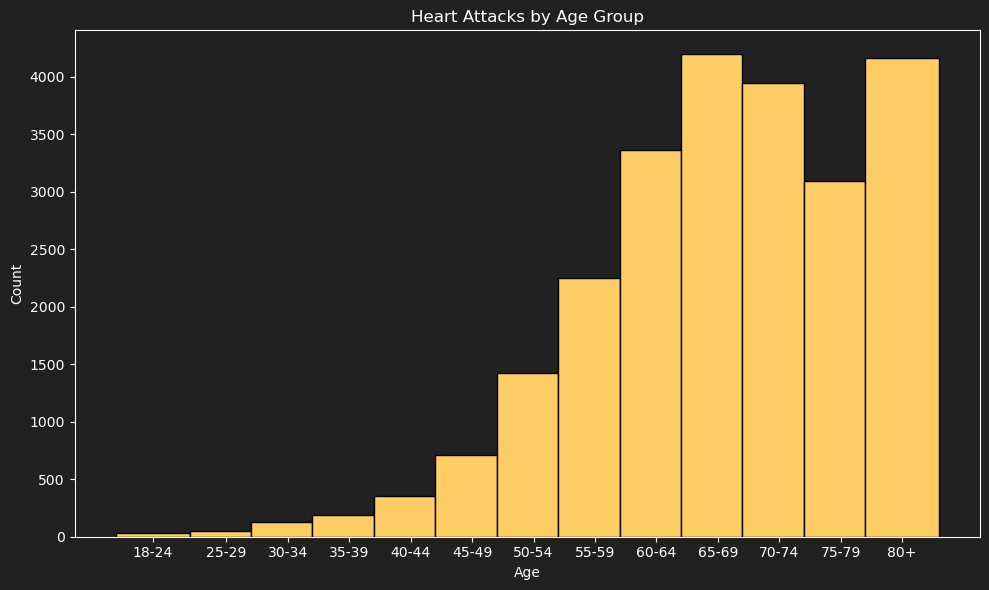

In [41]:
import matplotlib.pyplot as plt

heart_attack_df = df[df['HeartDiseaseorAttack'] == 1]

# Create a mapping from age group (1-13) to the corresponding midpoints of the age ranges
age_bin_mapping = {
    1: 21,  # midpoint of 18-24
    2: 27,  # midpoint of 25-29
    3: 32,  # midpoint of 30-34
    4: 37,  # midpoint of 35-39
    5: 42,  # midpoint of 40-44
    6: 47,  # midpoint of 45-49
    7: 52,  # midpoint of 50-54
    8: 57,  # midpoint of 55-59
    9: 62,  # midpoint of 60-64
    10: 67, # midpoint of 65-69
    11: 72, # midpoint of 70-74
    12: 77, # midpoint of 75-79
    13: 82  # midpoint of 80+
}

plt.figure(figsize=(10,6))

plt.gca().set_facecolor('#212121') 
plt.gcf().set_facecolor('#212121') 

plt.hist(heart_attack_df['Age'].map(age_bin_mapping), bins=[18, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 85], color='#ffcc66', edgecolor='black')

plt.title('Heart Attacks by Age Group', color='white')
plt.xlabel('Age', color='white')
plt.ylabel('Count', color='white')

plt.xticks(ticks=[21, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77, 82], 
           labels=['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+'], 
           color='white')
plt.yticks(color='white')

plt.tight_layout()
plt.show()


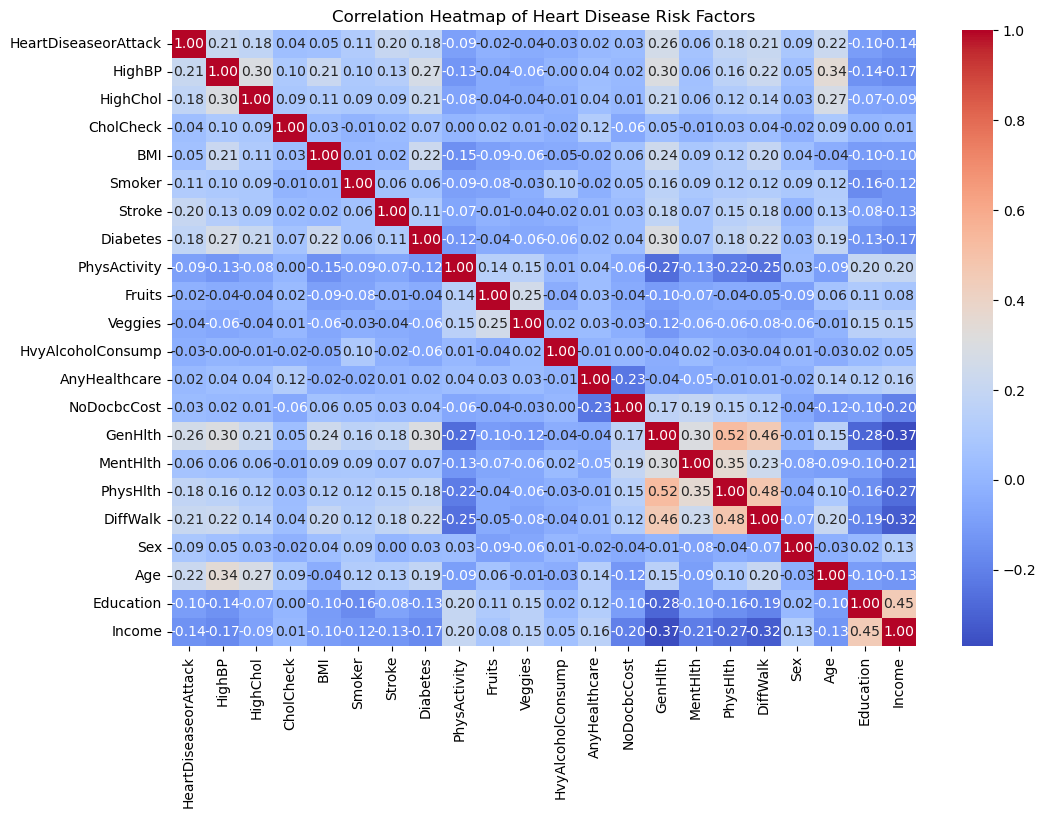

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Heart Disease Risk Factors')
plt.show()

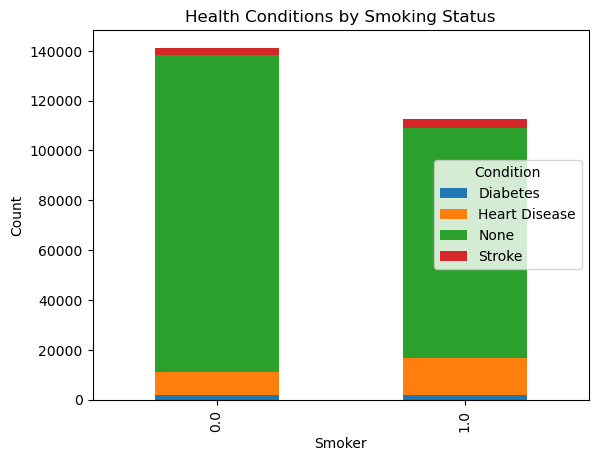

In [40]:
df['Condition'] = df.apply(lambda x: 'Heart Disease' if x['HeartDiseaseorAttack'] == 1 else
                                        ('Stroke' if x['Stroke'] == 1 else
                                         ('Diabetes' if x['Diabetes'] == 1 else 'None')), axis=1)

pd.crosstab(df['Smoker'], df['Condition']).plot(kind='bar', stacked=True)
plt.title('Health Conditions by Smoking Status')
plt.ylabel('Count')
plt.show()

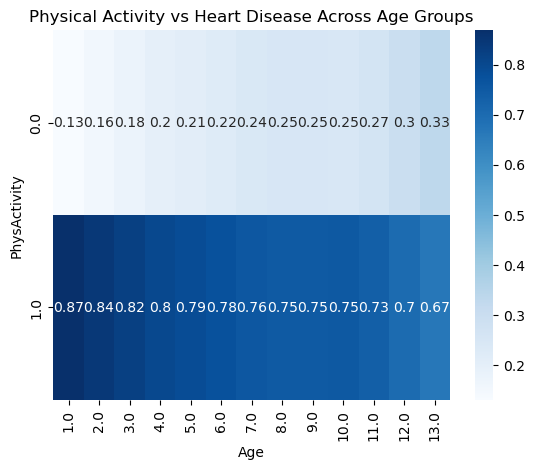

In [43]:
activity_vs_disease = pd.crosstab(df['PhysActivity'], df['Age'], normalize='columns')
sns.heatmap(activity_vs_disease, cmap='Blues', annot=True)
plt.title('Physical Activity vs Heart Disease Across Age Groups')
plt.show()

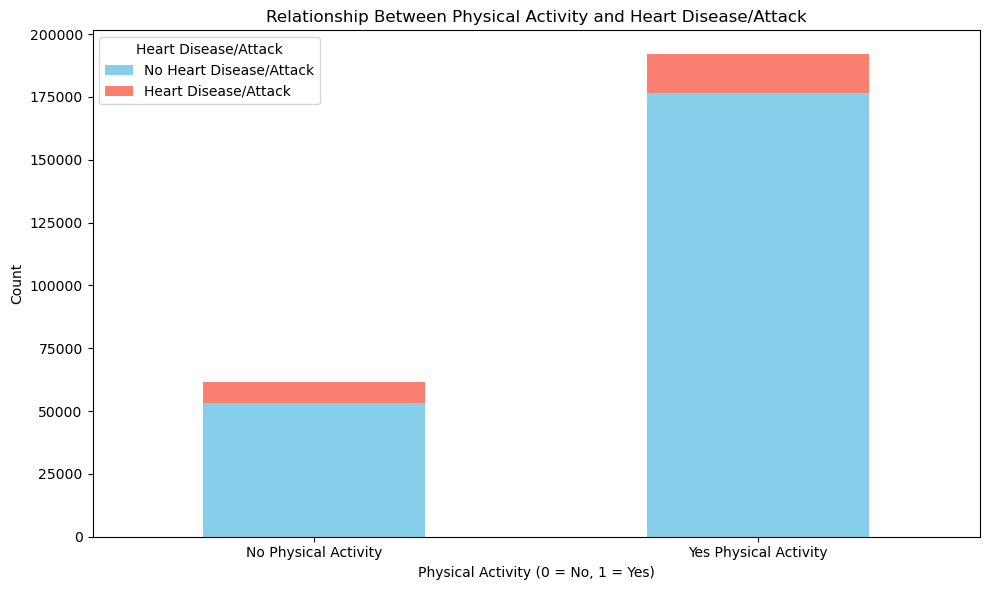

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

activity_vs_heart_disease = pd.crosstab(df['PhysActivity'], df['HeartDiseaseorAttack'])

activity_vs_heart_disease.plot(kind='bar', stacked=True, figsize=(10,6), color=['skyblue', 'salmon'])

plt.title('Relationship Between Physical Activity and Heart Disease/Attack')
plt.xlabel('Physical Activity (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Physical Activity', 'Yes Physical Activity'], rotation=0)
plt.legend(['No Heart Disease/Attack', 'Heart Disease/Attack'], title='Heart Disease/Attack')

plt.tight_layout()
plt.show()


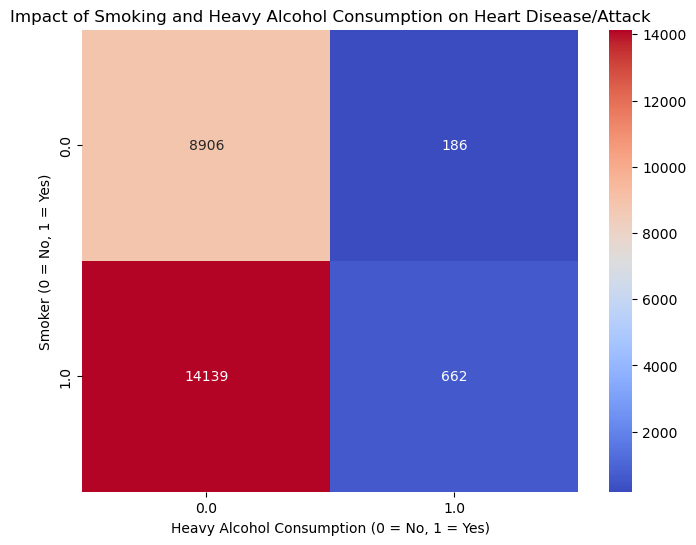

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

smoking_alcohol_heart_disease = pd.crosstab([df['Smoker'], df['HvyAlcoholConsump']], df['HeartDiseaseorAttack'])

heart_disease_counts = smoking_alcohol_heart_disease[1].unstack()

plt.figure(figsize=(8, 6))
sns.heatmap(heart_disease_counts, annot=True, cmap='coolwarm', fmt='g')

plt.title('Impact of Smoking and Heavy Alcohol Consumption on Heart Disease/Attack')
plt.xlabel('Heavy Alcohol Consumption (0 = No, 1 = Yes)')
plt.ylabel('Smoker (0 = No, 1 = Yes)')
plt.show()


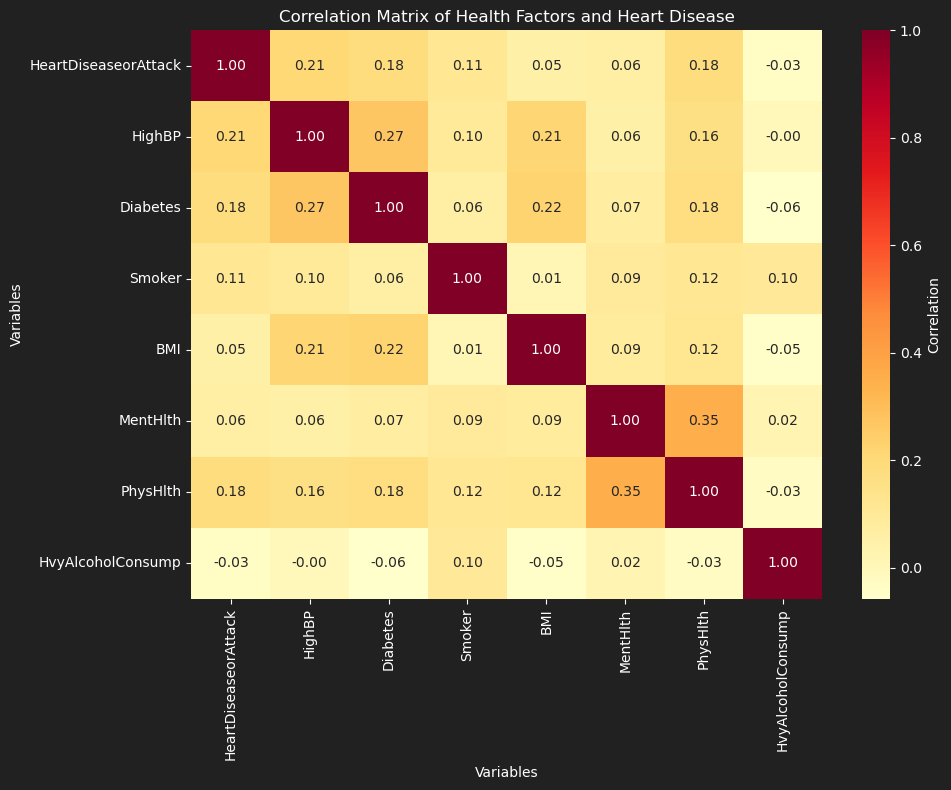

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_columns = ['HeartDiseaseorAttack', 'HighBP', 'Diabetes', 'Smoker', 'BMI', 'MentHlth', 'PhysHlth', 'HvyAlcoholConsump']

correlation_matrix = df[correlation_columns].corr()

plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='YlOrRd', cbar_kws={'label': 'Correlation'})

plt.gcf().set_facecolor('#212121')  
ax.set_facecolor('#212121')  

plt.title('Correlation Matrix of Health Factors and Heart Disease', color='white')
plt.xlabel('Variables', color='white')
plt.ylabel('Variables', color='white')
ax.tick_params(colors='white')  
ax.figure.axes[-1].yaxis.label.set_color('white')  
ax.figure.axes[-1].tick_params(colors='white')  
plt.tight_layout()
plt.show()


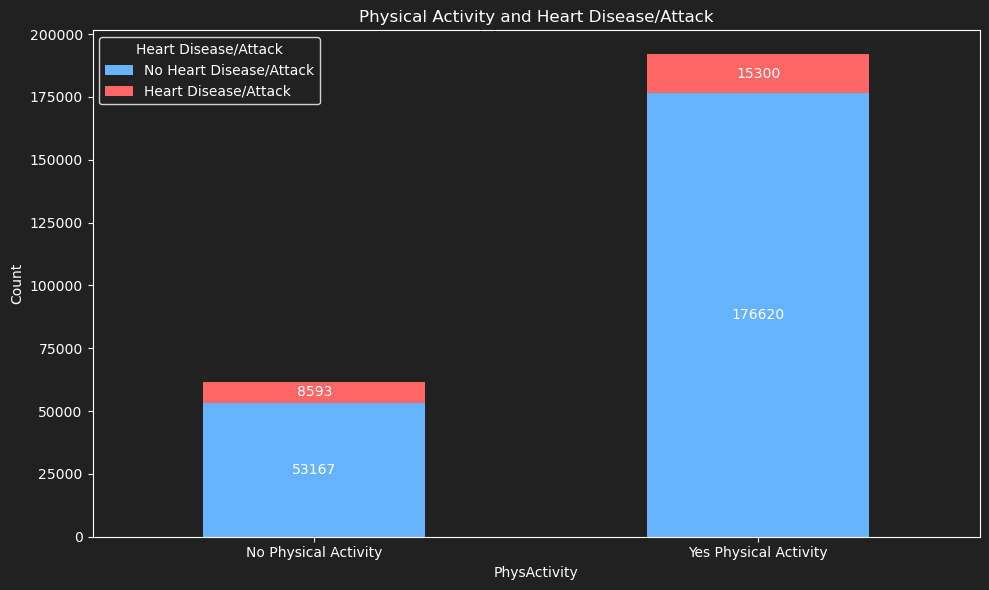

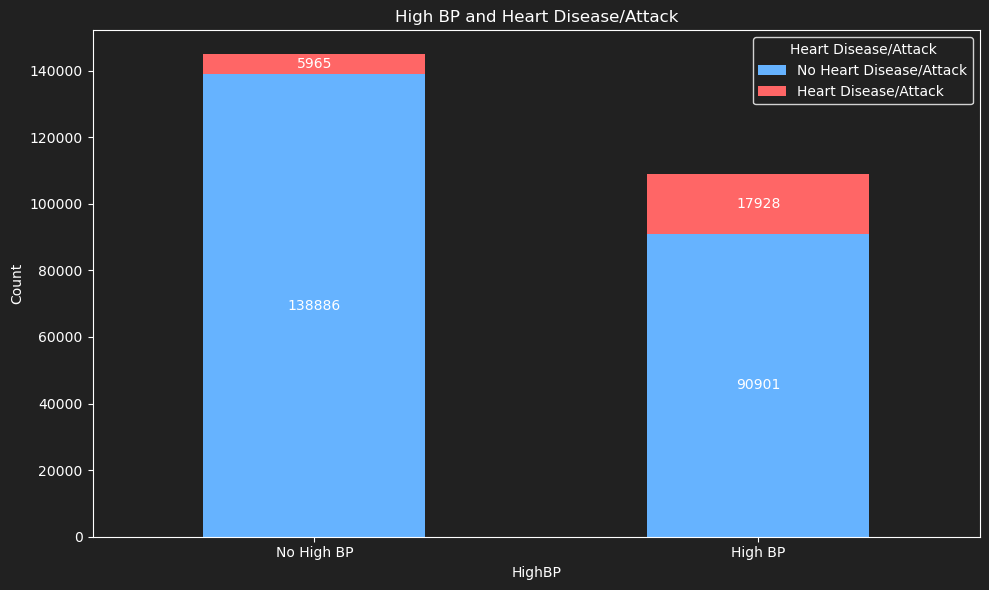

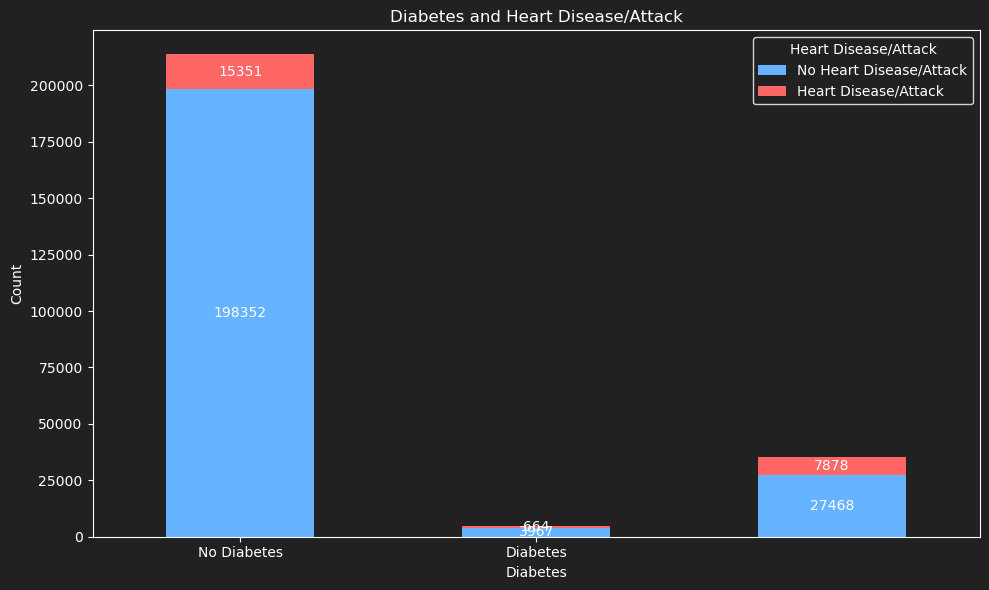

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('dark_background')

def plot_stacked_bar_with_centered_counts(df, x_var, y_var, x_labels, title):
    crosstab = pd.crosstab(df[x_var], df[y_var])
    
    ax = crosstab.plot(kind='bar', stacked=True, figsize=(10,6), color=['#66b3ff', '#ff6666'])
    
    plt.title(title, color='white')
    plt.xlabel(x_var.replace("_", " "), color='white')
    plt.ylabel('Count', color='white')
    plt.xticks([0, 1], x_labels, rotation=0, color='white')
    plt.yticks(color='white')
    plt.legend(['No Heart Disease/Attack', 'Heart Disease/Attack'], title='Heart Disease/Attack', facecolor='#212121', edgecolor='white')

    plt.gcf().set_facecolor('#212121')  # Set the figure background
    plt.gca().set_facecolor('#212121')  # Set the axes background

    for p in ax.patches:
        height = p.get_height()
        y_position = p.get_y() + height / 2
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., y_position), ha='center', va='center', color='white', fontsize=10)

    plt.tight_layout()
    plt.show()

# Plot 1: Physical Activity vs Heart Disease/Attack
plot_stacked_bar_with_centered_counts(df, 'PhysActivity', 'HeartDiseaseorAttack', ['No Physical Activity', 'Yes Physical Activity'], 'Physical Activity and Heart Disease/Attack')

# Plot 2: High BP vs Heart Disease/Attack
plot_stacked_bar_with_centered_counts(df, 'HighBP', 'HeartDiseaseorAttack', ['No High BP', 'High BP'], 'High BP and Heart Disease/Attack')

# Plot 3: Diabetes vs Heart Disease/Attack
plot_stacked_bar_with_centered_counts(df, 'Diabetes', 'HeartDiseaseorAttack', ['No Diabetes', 'Diabetes'], 'Diabetes and Heart Disease/Attack')


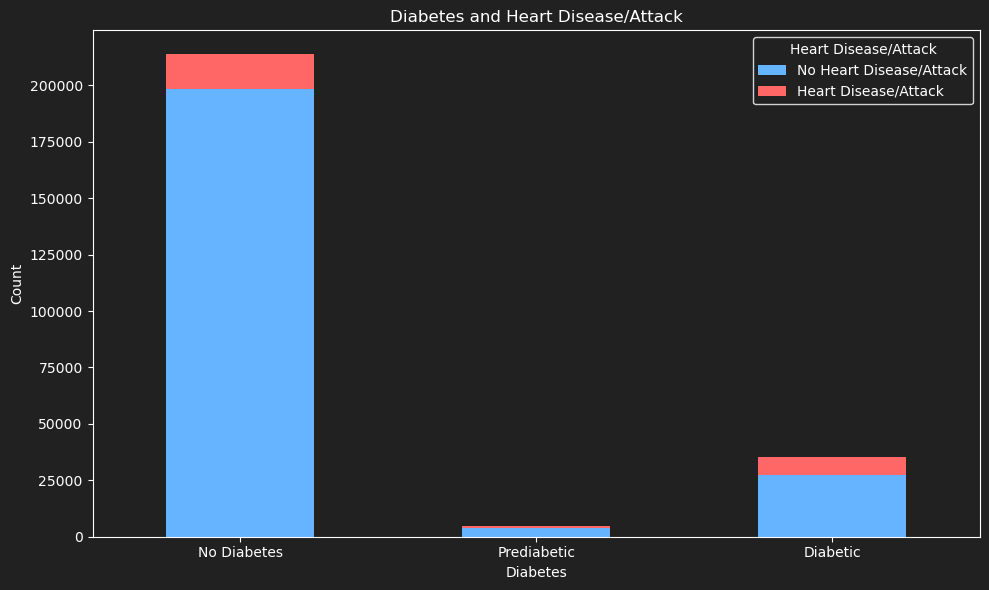

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('dark_background')

def plot_stacked_bar(df, x_var, y_var, x_labels, title):
    crosstab = pd.crosstab(df[x_var], df[y_var])
    
    
    ax = crosstab.plot(kind='bar', stacked=True, figsize=(10,6), color=['#66b3ff', '#ff6666'])
    
    
    plt.title(title, color='white')
    plt.xlabel(x_var.replace("_", " "), color='white')
    plt.ylabel('Count', color='white')
    plt.xticks([0, 1, 2], x_labels, rotation=0, color='white')
    plt.yticks(color='white')
    plt.legend(['No Heart Disease/Attack', 'Heart Disease/Attack'], title='Heart Disease/Attack', facecolor='#212121', edgecolor='white')

    # Set background color to #212121
    plt.gcf().set_facecolor('#212121')  
    plt.gca().set_facecolor('#212121')  

    plt.tight_layout()
    plt.show()

plot_stacked_bar(df, 'Diabetes', 'HeartDiseaseorAttack', ['No Diabetes', 'Prediabetic', 'Diabetic'], 'Diabetes and Heart Disease/Attack')


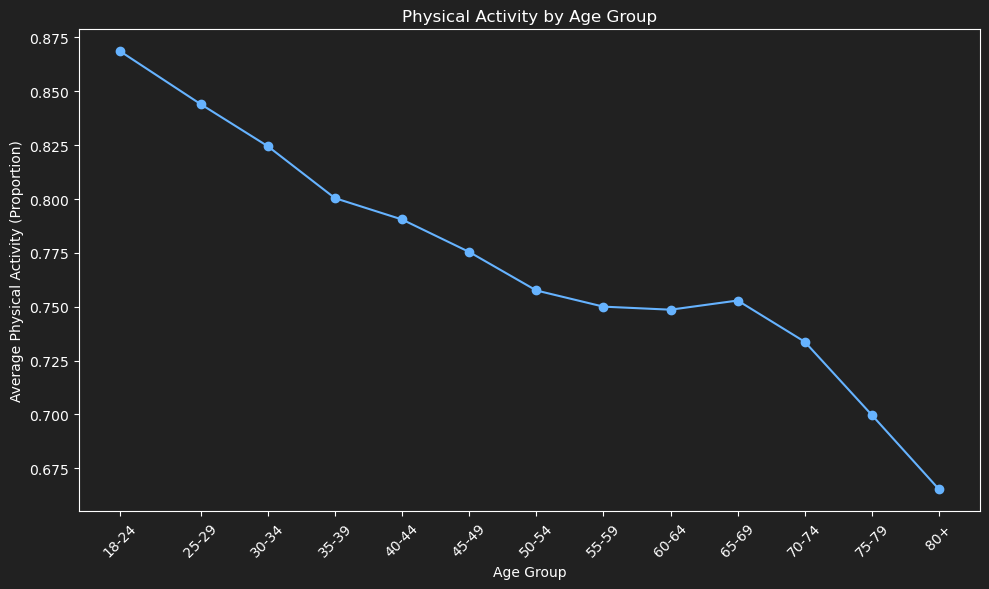

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

age_bin_mapping = {
    1: 21,  # midpoint of 18-24
    2: 27,  # midpoint of 25-29
    3: 32,  # midpoint of 30-34
    4: 37,  # midpoint of 35-39
    5: 42,  # midpoint of 40-44
    6: 47,  # midpoint of 45-49
    7: 52,  # midpoint of 50-54
    8: 57,  # midpoint of 55-59
    9: 62,  # midpoint of 60-64
    10: 67, # midpoint of 65-69
    11: 72, # midpoint of 70-74
    12: 77, # midpoint of 75-79
    13: 82  # midpoint of 80+
}

df['Age_Mapped'] = df['Age'].map(age_bin_mapping)

phys_activity_by_age = df.groupby('Age_Mapped')['PhysActivity'].mean()

plt.figure(figsize=(10, 6))

plt.plot(phys_activity_by_age.index, phys_activity_by_age.values, marker='o', linestyle='-', color='#66b3ff')

plt.title('Physical Activity by Age Group', color='white')
plt.xlabel('Age Group', color='white')
plt.ylabel('Average Physical Activity (Proportion)', color='white')
plt.xticks(ticks=[21, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77, 82], 
           labels=['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+'], 
           color='white', rotation=45)
plt.yticks(color='white')

plt.gcf().set_facecolor('#212121')
plt.gca().set_facecolor('#212121')
plt.tight_layout()
plt.show()


### **Splitting Data**

This section starts by seperating out the X and y variables. We then test a basic split, k-fold split and stratified split. The decided approach is the stratified split. 

In [3]:
# let's separate the feature matrix X, and target variable y
y = df['HeartDiseaseorAttack'] # remember, we want to predict who did or did not have a heart attack / disease 
X = df.loc[:, df.columns != 'HeartDiseaseorAttack'] # all other columns are features
print(y)
print(X.head())

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
253675    0.0
253676    0.0
253677    0.0
253678    0.0
253679    1.0
Name: HeartDiseaseorAttack, Length: 253680, dtype: float64
   HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  Diabetes  PhysActivity  \
0     1.0       1.0        1.0  40.0     1.0     0.0       0.0           0.0   
1     0.0       0.0        0.0  25.0     1.0     0.0       0.0           1.0   
2     1.0       1.0        1.0  28.0     0.0     0.0       0.0           0.0   
3     1.0       0.0        1.0  27.0     0.0     0.0       0.0           1.0   
4     1.0       1.0        1.0  24.0     0.0     0.0       0.0           1.0   

   Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  \
0     0.0      1.0  ...            1.0          0.0      5.0      18.0   
1     0.0      0.0  ...            0.0          1.0      3.0       0.0   
2     1.0      0.0  ...            1.0          1.0      5.0      30.0   
3     1.0 

#### **Applying Basic Split**

In [5]:
from sklearn.model_selection import train_test_split 

random_state = 42

# first split to separate out the training set
X_train, X_other, y_train, y_other = train_test_split(X,y,\
                    train_size = 0.6,random_state = random_state)
print('training set:',X_train.shape, y_train.shape) # 60% of points are in train
print(X_other.shape, y_other.shape) # 40% of points are in other

# second split to separate out the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,\
                    train_size = 0.5,random_state = random_state)
print('validation set:',X_val.shape, y_val.shape) # 20% of points are in validation
print('test set:',X_test.shape, y_test.shape) # 20% of points are in test

print(X_train.head())

training set: (152208, 21) (152208,)
(101472, 21) (101472,)
validation set: (50736, 21) (50736,)
test set: (50736, 21) (50736,)
        HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  Diabetes  \
1956       0.0       1.0        1.0  25.0     1.0     0.0       0.0   
49982      1.0       0.0        1.0  35.0     0.0     0.0       2.0   
229678     0.0       1.0        1.0  29.0     1.0     0.0       0.0   
35542      0.0       0.0        1.0  37.0     1.0     0.0       0.0   
155236     1.0       1.0        1.0  23.0     1.0     0.0       0.0   

        PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  \
1956             0.0     0.0      1.0  ...            1.0          0.0   
49982            1.0     1.0      1.0  ...            1.0          0.0   
229678           0.0     1.0      0.0  ...            1.0          0.0   
35542            1.0     1.0      1.0  ...            1.0          0.0   
155236           1.0     1.0      1.0  ...            1.0          0.0   



#### **Applying K-Fold Split**

These are really only good when you have a small dataset so it's not needed here but we've tested it out for 

In [6]:
from sklearn.model_selection import KFold
random_state =42

# first split to separate out the test set
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=random_state)
print(X_other.shape,y_other.shape)
print('test set:',X_test.shape,y_test.shape)

# do KFold split on other
kf = KFold(n_splits=5,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print('   training set:',X_train.shape, y_train.shape) 
    print('   validation set:',X_val.shape, y_val.shape) 
    # the validation set contains different points in each iteration
    print(X_val[['Age','Income']].head())

(202944, 21) (202944,)
test set: (50736, 21) (50736,)
   training set: (162355, 21) (162355,)
   validation set: (40589, 21) (40589,)
         Age  Income
233415  12.0     6.0
73782   13.0     4.0
145477  13.0     7.0
15239    9.0     8.0
229357   9.0     3.0
   training set: (162355, 21) (162355,)
   validation set: (40589, 21) (40589,)
         Age  Income
31141   12.0     8.0
99395    7.0     4.0
34003   10.0     8.0
190264   9.0     8.0
55190   11.0     6.0
   training set: (162355, 21) (162355,)
   validation set: (40589, 21) (40589,)
        Age  Income
98230   8.0     8.0
208255  5.0     7.0
193136  9.0     8.0
214238  8.0     8.0
185249  5.0     8.0
   training set: (162355, 21) (162355,)
   validation set: (40589, 21) (40589,)
         Age  Income
89662   12.0     6.0
72589    9.0     7.0
229293   3.0     8.0
212283  10.0     7.0
141622   9.0     7.0
   training set: (162356, 21) (162356,)
   validation set: (40588, 21) (40588,)
         Age  Income
97512    4.0     8.0
197903

In [4]:
print(y.value_counts())

# ~ 9% of the data is in the 1st class so we have an imbalanced data set 

HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64


In [6]:
from sklearn.model_selection import train_test_split 
import numpy as np

y = df['HeartDiseaseorAttack'] 
X = df.loc[:, df.columns != 'HeartDiseaseorAttack'] 

random_state = 90

X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_state)

print('**balance without stratification:**')
print(np.unique(y_train,return_counts=True))
print(np.unique(y_val,return_counts=True))
print(np.unique(y_test,return_counts=True))

X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,stratify=y,random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,stratify=y_other,random_state=random_state)
print('**balance with stratification:**')
print(np.unique(y_train,return_counts=True))
print(np.unique(y_val,return_counts=True))
print(np.unique(y_test,return_counts=True))

**balance without stratification:**
(array([0., 1.]), array([137741,  14467]))
(array([0., 1.]), array([46071,  4665]))
(array([0., 1.]), array([45975,  4761]))
**balance with stratification:**
(array([0., 1.]), array([137872,  14336]))
(array([0., 1.]), array([45958,  4778]))
(array([0., 1.]), array([45957,  4779]))


### **Preprocessing the Data**

In [7]:
#let's take a look at the columns to see what the mean and SD look like
columns_of_interest = ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 
                       'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 
                       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 
                       'Sex', 'Age', 'Education', 'Income']

mean_values = df[columns_of_interest].mean()
std_values = df[columns_of_interest].std()

stats_df = pd.DataFrame({'Mean': mean_values, 'Standard Deviation': std_values})

print(stats_df)

                           Mean  Standard Deviation
HeartDiseaseorAttack   0.094186            0.292087
HighBP                 0.429001            0.494934
HighChol               0.424121            0.494210
CholCheck              0.962670            0.189571
BMI                   28.382364            6.608694
Smoker                 0.443169            0.496761
Stroke                 0.040571            0.197294
Diabetes               0.296921            0.698160
PhysActivity           0.756544            0.429169
Fruits                 0.634256            0.481639
Veggies                0.811420            0.391175
HvyAlcoholConsump      0.056197            0.230302
AnyHealthcare          0.951053            0.215759
NoDocbcCost            0.084177            0.277654
GenHlth                2.511392            1.068477
MentHlth               3.184772            7.412847
PhysHlth               4.242081            8.717951
DiffWalk               0.168224            0.374066
Sex         

In [8]:
#Standard Scala for the continous columns 
from sklearn.preprocessing import StandardScaler

continuous_columns = ['BMI', 'NoDocbcCost', 'MentHlth', 'PhysHlth']  # Add other continuous columns if needed
scaler = StandardScaler()

df[continuous_columns] = scaler.fit_transform(df[continuous_columns])

In [10]:
#Let's check in on the mean and SD again 
columns_of_interest = ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 
                       'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 
                       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 
                       'Sex', 'Age', 'Education', 'Income']

mean_values = df[columns_of_interest].mean()
std_values = df[columns_of_interest].std()
stats_df = pd.DataFrame({'Mean': mean_values, 'Standard Deviation': std_values})
print(stats_df)

                              Mean  Standard Deviation
HeartDiseaseorAttack  9.418559e-02            0.292087
HighBP                4.290011e-01            0.494934
HighChol              4.241209e-01            0.494210
CholCheck             9.626695e-01            0.189571
BMI                  -2.505162e-16            1.000002
Smoker                4.431686e-01            0.496761
Stroke                4.057080e-02            0.197294
Diabetes              2.969213e-01            0.698160
PhysActivity          7.565437e-01            0.429169
Fruits                6.342558e-01            0.481639
Veggies               8.114199e-01            0.391175
HvyAlcoholConsump     5.619678e-02            0.230302
AnyHealthcare         9.510525e-01            0.215759
NoDocbcCost          -1.792602e-17            1.000002
GenHlth               2.511392e+00            1.068477
MentHlth              8.963011e-18            1.000002
PhysHlth              3.450759e-17            1.000002
DiffWalk  